# About a company

Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company

# Questions for the analysis

1. What are some trends in smart device usage? 
2. How could these trends apply to Bellabeat customers? 
3. How could these trends help influence Bellabeat marketing strategy

# Business task

Identify potential opportunities for growth and recommendations for the Bellabeat marketing strategy improvement based on trends in smart device usage.

# Loading packages


In [1]:
library(gridExtra)
library(tidyverse)
library(magrittr) 
library(skimr)
library(janitor)
library(ggplot2)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




# Loading packages

In [2]:
activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
steps <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

Some datasets have small sample sizes (heart rate dataset = 7 users).
Weight dataset has also a very small sample size and there are several other factors in considering weight, that are not recorded in dataset(bone mass, muscle mass etc.)

# Preview our datasets

In [3]:
str(activity)
str(steps)
str(sleep)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

We can see that date columns in each dateset have a string type not date type

# Date format fixing

In [4]:
activity$ActivityDate=as.POSIXct(activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone()) 
colnames(activity)[2] ="date"
  
sleep$SleepDay=as.POSIXct(sleep$SleepDay, format="%m/%d/%Y", tz=Sys.timezone())
colnames(sleep)[2] ="date"
  
steps$ActivityHour = as.POSIXct(steps$ActivityHour,format ="%m/%d/%Y %I:%M:%S %p" , tz="UTC")
colnames(steps)[2] ="date_time"

# Looking for duplicates

In [5]:
sum(duplicated(activity))
sum(duplicated(sleep))
sum(duplicated(steps))

[1] 0

[1] 3

[1] 0

sleep has 3 duplicate rows in data frame

# Deleting duplicates

In [6]:
sleep <- sleep %>%
  distinct() %>%
  drop_na()

# Cleaning column names. 
Columns names are set to lowercase to avoid grammatical errors.

In [7]:

clean_names(activity)
activity<- rename_with(activity, tolower)
clean_names(sleep)
sleep <- rename_with(sleep, tolower)
clean_names(steps)
steps <- rename_with(steps, tolower)


id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,2016-04-18,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,2016-04-20,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


id,date,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<dttm>,<int>,<int>,<int>
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320
1503960366,2016-04-20,1,360,377
1503960366,2016-04-21,1,325,364
1503960366,2016-04-23,1,361,384


id,date_time,step_total
<dbl>,<dttm>,<int>
1503960366,2016-04-12 00:00:00,373
1503960366,2016-04-12 01:00:00,160
1503960366,2016-04-12 02:00:00,151
1503960366,2016-04-12 03:00:00,0
1503960366,2016-04-12 04:00:00,0
1503960366,2016-04-12 05:00:00,0
1503960366,2016-04-12 06:00:00,0
1503960366,2016-04-12 07:00:00,0
1503960366,2016-04-12 08:00:00,250


# Unique users

In [8]:
n_unique(activity$id)
n_unique(sleep$id)
n_unique(steps$id)

[1] 33

[1] 24

[1] 33

# Checking our datasets

In [9]:
head(activity)
head(sleep)
head(steps)

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<dttm>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346
2,1503960366,2016-04-13,2,384,407
3,1503960366,2016-04-15,1,412,442
4,1503960366,2016-04-16,2,340,367
5,1503960366,2016-04-17,1,700,712
6,1503960366,2016-04-19,1,304,320


,id,date_time,steptotal
,<dbl>,<dttm>,<int>
1,1503960366,2016-04-12 00:00:00,373
2,1503960366,2016-04-12 01:00:00,160
3,1503960366,2016-04-12 02:00:00,151
4,1503960366,2016-04-12 03:00:00,0
5,1503960366,2016-04-12 04:00:00,0
6,1503960366,2016-04-12 05:00:00,0


# Summary statistics

In [10]:
activity %>%  
  select(totalsteps,
         totaldistance,
         sedentaryminutes, 
         calories) %>%
  summary()

sleep %>%
  select(totalsleeprecords,
         totalminutesasleep,
         totaltimeinbed) %>%
  summary()

steps %>% 
  select(steptotal) %>% 
  summary()

   totalsteps    totaldistance    sedentaryminutes    calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

 totalsleeprecords totalminutesasleep totaltimeinbed 
 Min.   :1.00      Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8  
 Median :1.00      Median :432.5      Median :463.0  
 Mean   :1.12      Mean   :419.2      Mean   :458.5  
 3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.00      Max.   :796.0      Max.   :961.0  

   steptotal      
 Min.   :    0.0  
 1st Qu.:    0.0  
 Median :   40.0  
 Mean   :  320.2  
 3rd Qu.:  357.0  
 Max.   :10554.0  

# Merging datasets

In [11]:
merged_activity_sleep <- merge(activity, sleep, by=c('id', 'date'))
glimpse(merged_activity_sleep)  
head(merged_activity_sleep)

Rows: 410
Columns: 18
$ id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ date                     <dttm> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-…
$ totalsteps               <int> 13162, 10735, 9762, 12669, 9705, 15506, 10544…
$ totaldistance            <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ trackerdistance          <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ loggedactivitiesdistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactivedistance       <dbl> 1.88, 1.57, 2.14, 2.71, 3.19, 3.53, 1.96, 1.3…
$ moderatelyactivedistance <dbl> 0.55, 0.69, 1.26, 0.41, 0.78, 1.32, 0.48, 0.3…
$ lightactivedistance      <dbl> 6.06, 4.71, 2.83, 5.04, 2.51, 5.03, 4.24, 4.6…
$ sedentaryactivedistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactiveminutes        <int> 25, 21, 29, 36, 38, 50, 28, 19, 41, 39, 73, 3…
$ fairlyactiveminutes      <int> 13, 19, 34, 10, 20, 31, 12, 8, 21, 5, 14, 23,…
$ lightlyactivemin

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320


In [12]:
n_unique(merged_activity_sleep$id)

[1] 24

24 users

# Classification
Classification has been made by following these articles: https://www.medicinenet.com/how_many_steps_a_day_is_considered_active/article.htm and
 https://www.medicalnewstoday.com/articles/sitting-down-all-day#how-long-is-too-long

In [13]:
daily_average <- merged_activity_sleep %>%
  group_by(id) %>%
  summarise (mean_daily_steps = mean(totalsteps),
             mean_daily_calories = mean(calories),
             mean_daily_sedentary_minutes = mean(sedentaryminutes),
             mean_daily_moderate_activity = mean(fairlyactiveminutes+veryactiveminutes),
             mean_daily_sleep = mean(totalminutesasleep))

head(daily_average)

user_types <- daily_average %>%
  mutate(steps_type = case_when(
    mean_daily_steps < 5000 ~ "sedentary",
    mean_daily_steps >= 5000 & mean_daily_steps < 7499 ~ "low active", 
    mean_daily_steps >= 7500 & mean_daily_steps < 9999 ~ "somewhat active", 
    mean_daily_steps >= 10000 & mean_daily_steps < 12499 ~ "active",
    mean_daily_steps >= 12500 ~ "highly active" ))%>%
  mutate(health_risk_sedentary = case_when(
    mean_daily_sedentary_minutes < 239 ~ "low risk",
    mean_daily_sedentary_minutes >= 240 & mean_daily_sedentary_minutes < 479 ~ "medium risk", 
    mean_daily_sedentary_minutes >= 480 & mean_daily_sedentary_minutes < 659 ~ "high risk", 
    mean_daily_sedentary_minutes >= 660  ~ "very high risk", )) %>% 
  mutate(enough_moderate_exercise=case_when(
    mean_daily_moderate_activity > 21.43 ~ "YES",
    mean_daily_moderate_activity < 21.43 ~ "NO"
))

id,mean_daily_steps,mean_daily_calories,mean_daily_sedentary_minutes,mean_daily_moderate_activity,mean_daily_sleep
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12405.680,1872.280,759.2800,58.2000000,360.2800
1644430081,7967.750,2977.750,920.5000,22.0000000,294.0000
1844505072,3477.000,1676.333,443.3333,2.3333333,652.0000
1927972279,1490.000,2316.200,977.2000,0.0000000,417.0000
2026352035,5618.679,1540.786,653.9643,0.3928571,506.1786
2320127002,5079.000,1804.000,1129.0000,0.0000000,61.0000


# Lowering the risk through at least moderate exercise

In [14]:
mean_daily_sedentary_minutes_percent <- user_types %>%
  group_by(health_risk_sedentary) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(health_risk_sedentary) %>%
  summarise(total_percent = total / totals) %>% 
  mutate(labels = scales::percent(total_percent))

head(mean_daily_sedentary_minutes_percent)

health_risk_sedentary,total_percent,labels
<chr>,<dbl>,<chr>
high risk,0.16666667,17%
medium risk,0.04166667,4%
very high risk,0.79166667,79%


# Creating new dataframe for better visualization

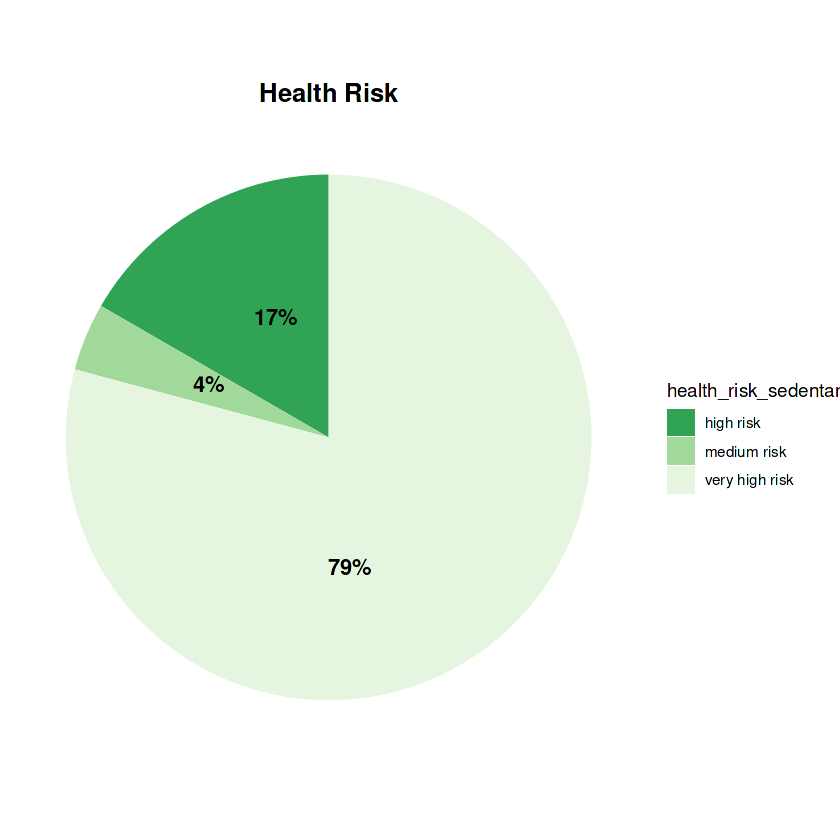

In [15]:
ggplot(mean_daily_sedentary_minutes_percent, aes(x="", y=total_percent, fill=health_risk_sedentary)) +
      geom_bar(stat="identity", width=1) +
      coord_polar("y", start=0)+
      theme_void()+
      scale_fill_brewer(palette = "Greens", direction= -1)+
      geom_text(aes(label = labels, fontface = "bold"),position = position_stack(vjust = 0.6), size=4.5)+
      theme(plot.title = element_text(hjust = 0.5, size=15, face = "bold"))+
      labs(title="Health Risk")

Almost 80% of users had very high health risk due to excessive sedentary time

# Creating new dataframe for better visualization

In [16]:
steps_type_percent <- user_types %>%
  group_by(steps_type) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(steps_type) %>%
  summarise(total_percent = total / totals) %>% 
  mutate(labels = scales::percent(total_percent))

Arranging data frame in order

In [17]:
steps_type_percent$steps_type <- factor(steps_type_percent$steps_type , levels = c("highly active", "active", "somewhat active", "low active", "sedentary"))
steps_type_percent <- steps_type_percent[order(steps_type_percent$steps_type),]

head(mean_daily_sedentary_minutes_percent)

health_risk_sedentary,total_percent,labels
<chr>,<dbl>,<chr>
high risk,0.16666667,17%
medium risk,0.04166667,4%
very high risk,0.79166667,79%


# Visualization

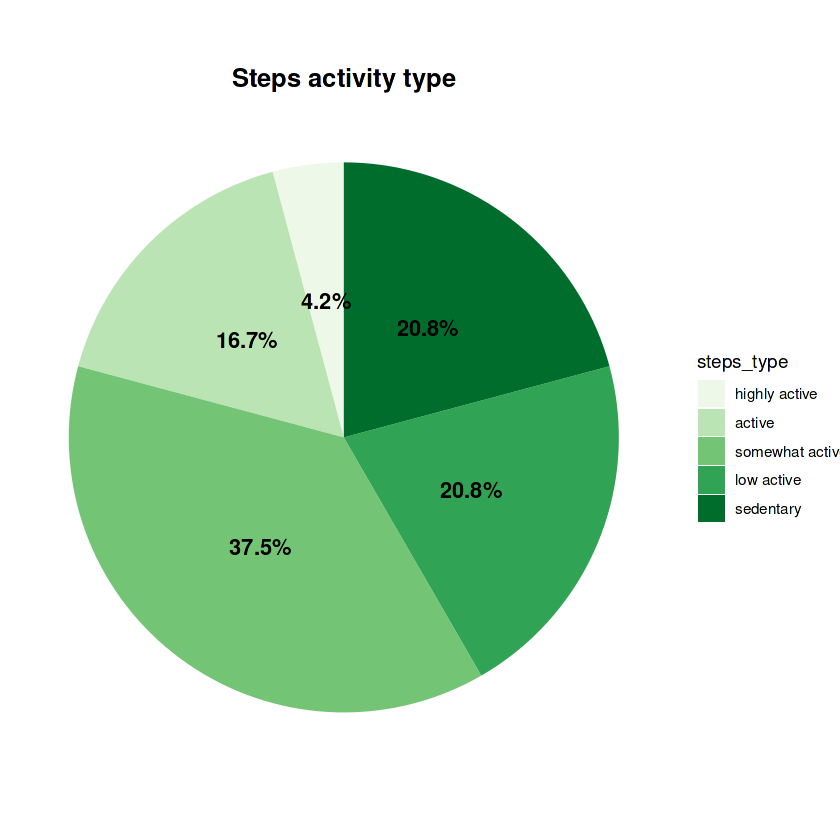

In [18]:
ggplot(steps_type_percent, aes(x="", y=total_percent, fill=steps_type)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0)+
  theme_void()+
  scale_fill_brewer(palette = "Greens")+
  geom_text(aes(label = labels, fontface="bold"),position = position_stack(vjust = 0.5), size=4.5)+
  theme(plot.title = element_text(hjust = 0.5, size=15, face = "bold"))+
  labs(title="Steps activity type")

Users are mostly somewhat active in terms of steps. Only about 21% have mean daily steps more than 10,000 steps

# Extracting weekday from dates and arranging them from Monday to Sunday


In [19]:
days_steps_activity_sleep_calories <- merged_activity_sleep %>%
  mutate(day = weekdays(date))

days_steps_activity_sleep_calories$day <-ordered(days_steps_activity_sleep_calories$day,
                                         levels=c("Monday", "Tuesday", "Wednesday", "Thursday",
                                                  "Friday", "Saturday", "Sunday"))

# Creating a summary for each day

In [20]:
days_steps_activity_sleep_calories <-days_steps_activity_sleep_calories%>%
  group_by(day) %>%
  summarize (steps = mean(totalsteps), moderate_activity = mean(veryactiveminutes + fairlyactiveminutes), sleep = mean(totalminutesasleep), calories = mean(calories))

head(days_steps_activity_sleep_calories)

day,steps,moderate_activity,sleep,calories
<ord>,<dbl>,<dbl>,<dbl>,<dbl>
Monday,9273.217,49.80435,419.5000,2431.978
Tuesday,9182.692,50.66154,404.5385,2496.200
Wednesday,8022.864,38.07576,434.6818,2378.242
Thursday,8183.516,38.71875,401.2969,2306.672
Friday,7901.404,35.73684,405.4211,2329.649
Saturday,9871.123,50.28070,419.0702,2506.895


# Visualization of the summary

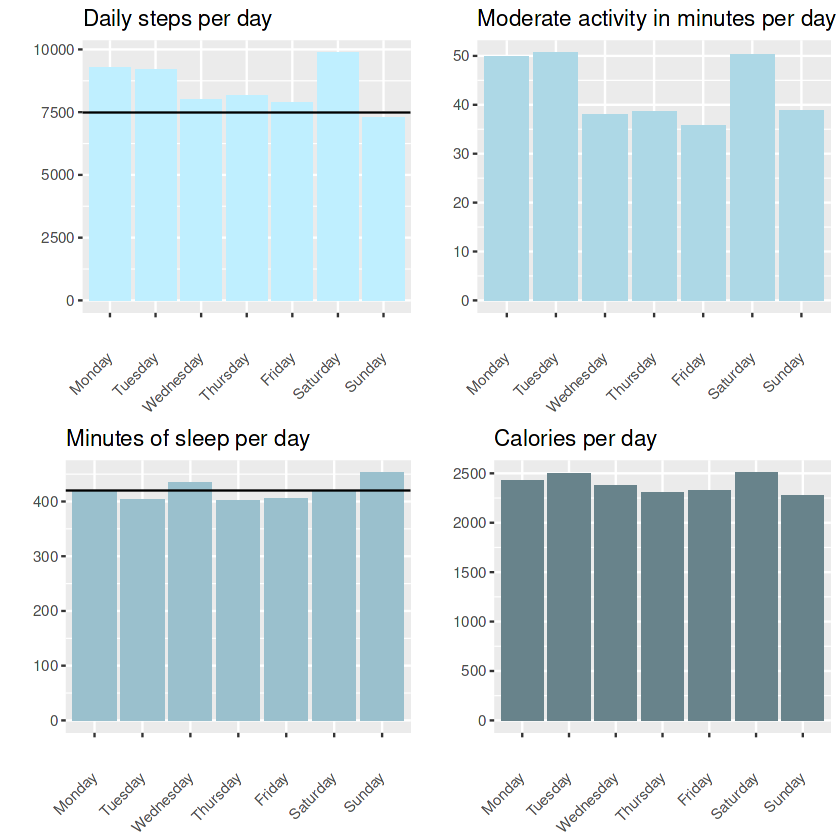

In [21]:
grid.arrange(
ggplot(days_steps_activity_sleep_calories) +
  geom_col(aes(day, steps), fill = "lightblue1") +
  labs(title = "Daily steps per day", x= "", y = "") +
  theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1))+
  geom_hline(yintercept = 7500) ,

ggplot(days_steps_activity_sleep_calories) +
  geom_col(aes(day, moderate_activity), fill = "lightblue") +
  labs(title = "Moderate activity in minutes per day", x= "", y = "") +
  theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1)),

ggplot(days_steps_activity_sleep_calories) +
  geom_col(aes(day, sleep), fill = "lightblue3") +
  labs(title = "Minutes of sleep per day", x= "", y = "") +
  theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1))+
  geom_hline(yintercept = 420),

ggplot(days_steps_activity_sleep_calories) +
  geom_col(aes(day, calories), fill = "lightblue4") +
  labs(title = "Calories per day", x= "", y = "") +
  theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1))

)

# Extracting time from date_time

In [22]:
steps$time <- format(as.POSIXct(steps$date_time), format = "%H:%M:%S" )
head(steps)

,id,date_time,steptotal,time
,<dbl>,<dttm>,<int>,<chr>
1,1503960366,2016-04-12 00:00:00,373,00:00:00
2,1503960366,2016-04-12 01:00:00,160,01:00:00
3,1503960366,2016-04-12 02:00:00,151,02:00:00
4,1503960366,2016-04-12 03:00:00,0,03:00:00
5,1503960366,2016-04-12 04:00:00,0,04:00:00
6,1503960366,2016-04-12 05:00:00,0,05:00:00


Adding column mean_daily_sleep to steps table

In [23]:
steps_sleep <- steps %>% 
  left_join(select(user_types, id, mean_daily_sleep), by="id")

Filtering out everyone who slept more than 6 hours a day

In [24]:
steps_sleep_six_hours <- filter(steps_sleep, mean_daily_sleep < 360)

Getting total steps for each hour

In [25]:
steps_sleep_six_hours <-steps_sleep_six_hours %>%
  group_by(time) %>%
  summarize(average_steps = mean(steptotal))

# Visualization

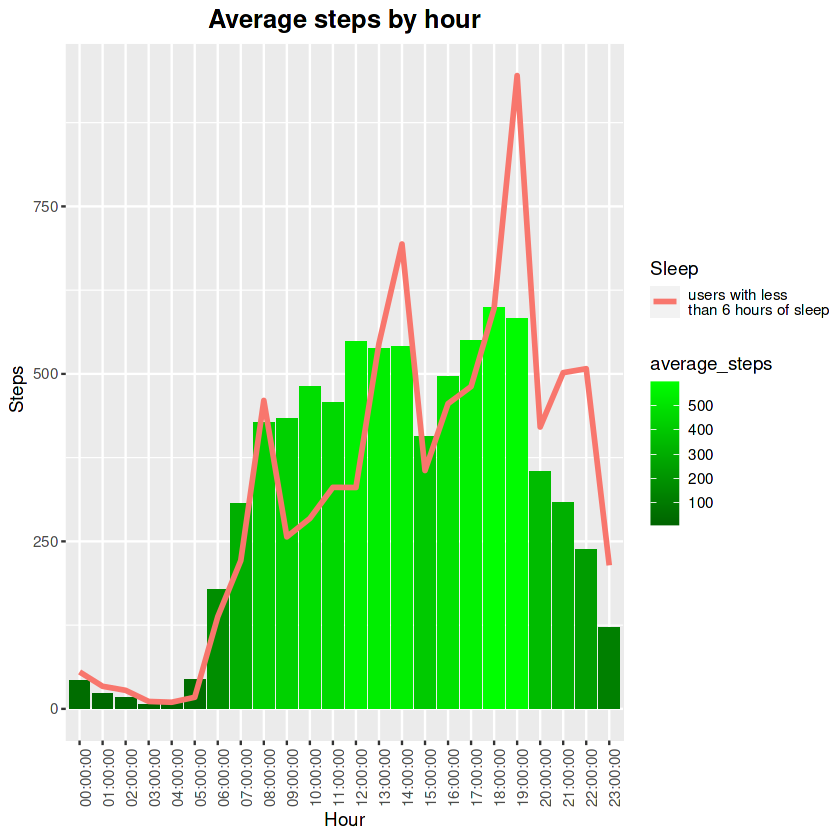

In [26]:
steps %>%
  group_by(time) %>%
  summarize(average_steps = mean(steptotal)) %>%
  ggplot() +
  geom_col(mapping = aes(x=time, y = average_steps, fill = average_steps)) + 
  geom_line(aes(x=steps_sleep_six_hours$time, y = steps_sleep_six_hours$average_steps, color="users with less
than 6 hours of sleep"), linewidth=1.2, group=1)+
  labs(title = "Average steps by hour", x="Hour", y=" Steps", color="Sleep") + 
  scale_fill_gradient(low = "darkgreen", high = "green")+
  theme(axis.text.x = element_text(angle = 90), plot.title = element_text(hjust = 0.5, size=15, face = "bold"))

Users are more active during the day. Especially in the late morning and in the evening (peak during 17:00 to 19:00)
This graph shows that people who sleep less hours tend to walk more in evenings and night, therefore they can have problems sleeping

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


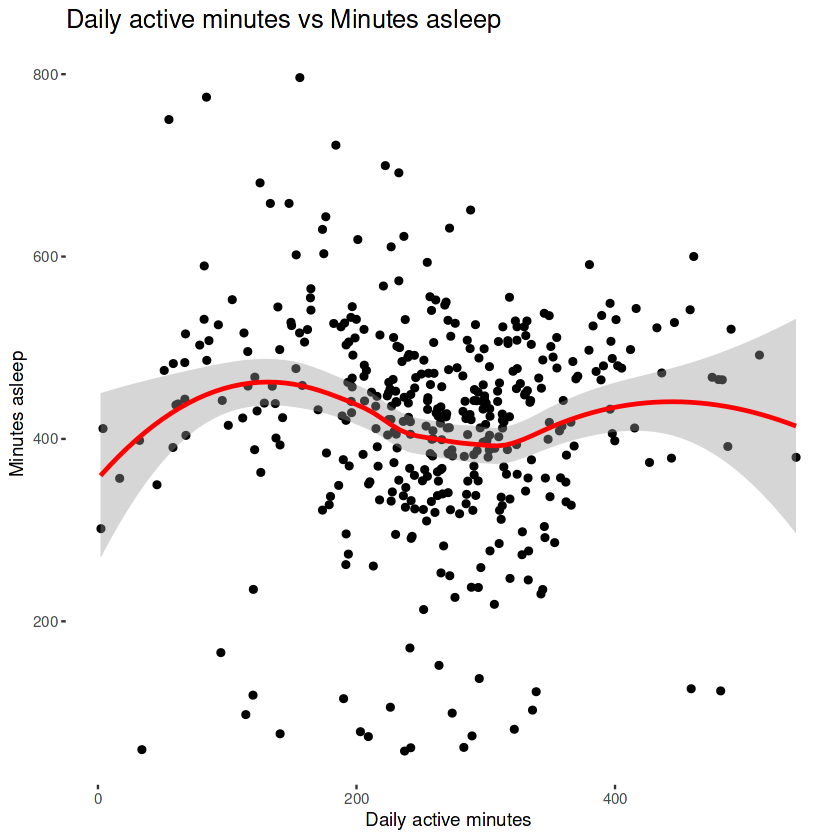

In [27]:
ggplot(merged_activity_sleep, aes(x=veryactiveminutes+fairlyactiveminutes+lightlyactiveminutes, y=totalminutesasleep))+
  geom_jitter() +
  geom_smooth(color = "red") + 
  labs(title = "Daily active minutes vs Minutes asleep", x = "Daily active minutes", y= "Minutes asleep") +
  theme(panel.background = element_blank(),
        plot.title = element_text(size=15))

There is no correlation between daily active minutes and daily minutes asleep


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


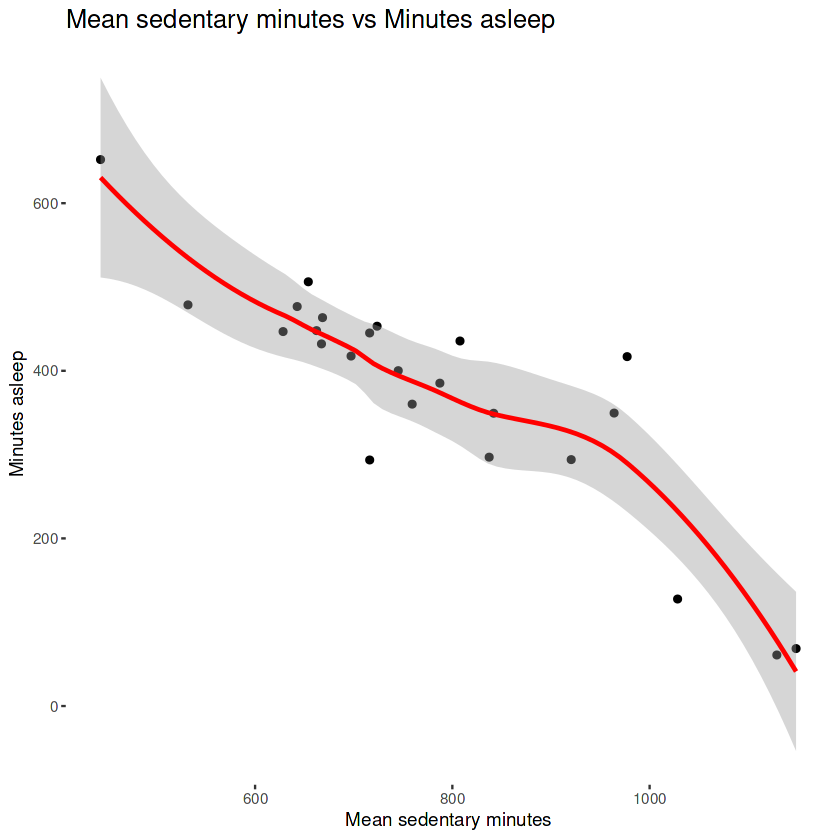

In [28]:
ggplot(daily_average, aes(x=mean_daily_sedentary_minutes, y=mean_daily_sleep))+
  geom_jitter() +
  geom_smooth(color = "red") + 
  labs(title = "Mean sedentary minutes vs Minutes asleep", x = "Mean sedentary minutes", y= "Minutes asleep") +
  theme(panel.background = element_blank(),
        plot.title = element_text(size=15))

There is a negative correlation between mean sedentary minutes and minutes asleep of a user. However this correlation has only 24 entries and minimal sample size is considered no less than 30.
But this can indicate even more problems with sedentary lifestyle

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


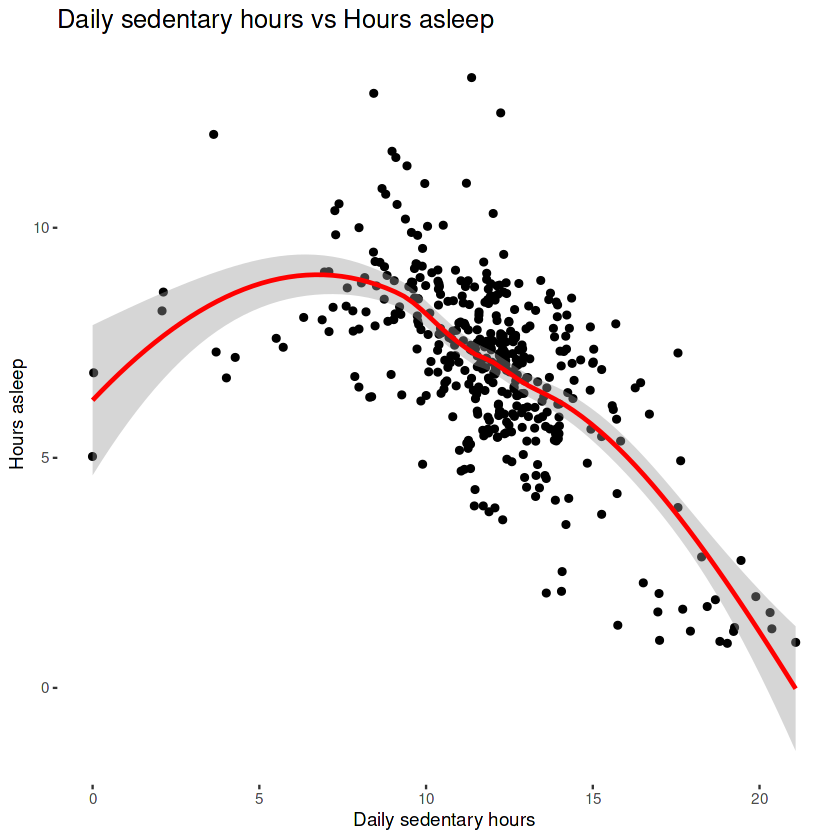

In [29]:
ggplot(merged_activity_sleep, aes(x=sedentaryminutes/60, y=totalminutesasleep/60))+
  geom_jitter() +
  geom_smooth(color = "red") + 
  labs(title = "Daily sedentary hours vs Hours asleep", x = "Daily sedentary hours", y= "Hours asleep") +
  theme(panel.background = element_blank(),
        plot.title = element_text(size=15))

This graph proves the negative correlation from the previous graph. Few entries show that very few sedentary hours could lead to less time asleep. 
But most of entries show the negative correlation. The more sedentary lifestyle is, the less sleep users are getting.

Assigning usage type to each user according to their watch usage in days

In [30]:
daily_use <- merged_activity_sleep %>%
  group_by(id) %>%
  summarize(days_used=sum(n())) %>%
  mutate(usage = case_when(
    days_used >= 1 & days_used <= 10 ~ "low use",
    days_used >= 11 & days_used <= 20 ~ "moderate use", 
    days_used >= 21 & days_used <= 27 ~ "high use", 
    days_used >= 28 & days_used <= 31 ~ "very high use",
  ))

head(daily_use)

id,days_used,usage
<dbl>,<int>,<chr>
1503960366,25,high use
1644430081,4,low use
1844505072,3,low use
1927972279,5,low use
2026352035,28,very high use
2320127002,1,low use


Getting the percent of each usage type

In [31]:
daily_use_percent <- daily_use %>%
  group_by(usage) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(usage) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent)) 

Arranging data frame in order

In [32]:
daily_use_percent$usage <- factor(daily_use_percent$usage, levels = c("very high use", "high use", "moderate use", "low use"))
daily_use_percent <- daily_use_percent[order(daily_use_percent$usage),]

# Visualizing watch usage

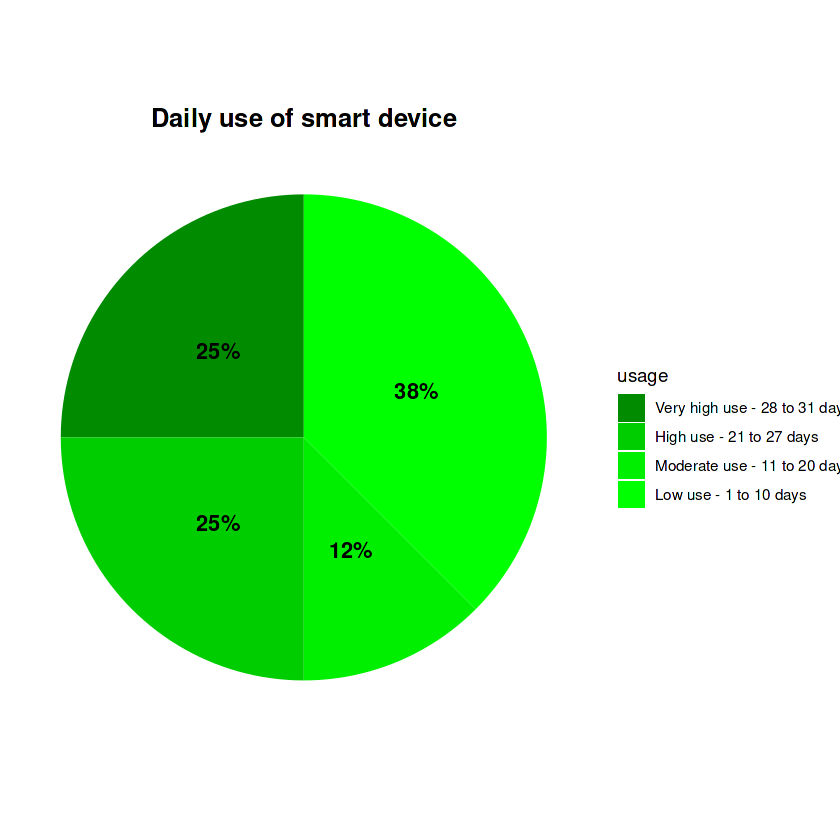

In [33]:
daily_use_percent %>%
  ggplot(aes(x="",y=total_percent, fill=usage)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_void()+
  theme( plot.title = element_text(hjust = 0.5, size=15, face = "bold")) +
  geom_text(aes(label = labels, fontface = "bold"),
            position = position_stack(vjust = 0.5), size = 4.5)+
  scale_fill_manual(values = c("green4","green3","green2","green1"),
                    labels = c("Very high use - 28 to 31 days",
                              "High use - 21 to 27 days",
                               "Moderate use - 11 to 20 days",
                               "Low use - 1 to 10 days"))+
  labs(title="Daily use of smart device")

The largest part of usage types belong to Low use. 38% of users use their watch less than 11 days in a month